# Measuring distance dependent frequency shift
- external FG to drive probe piezo
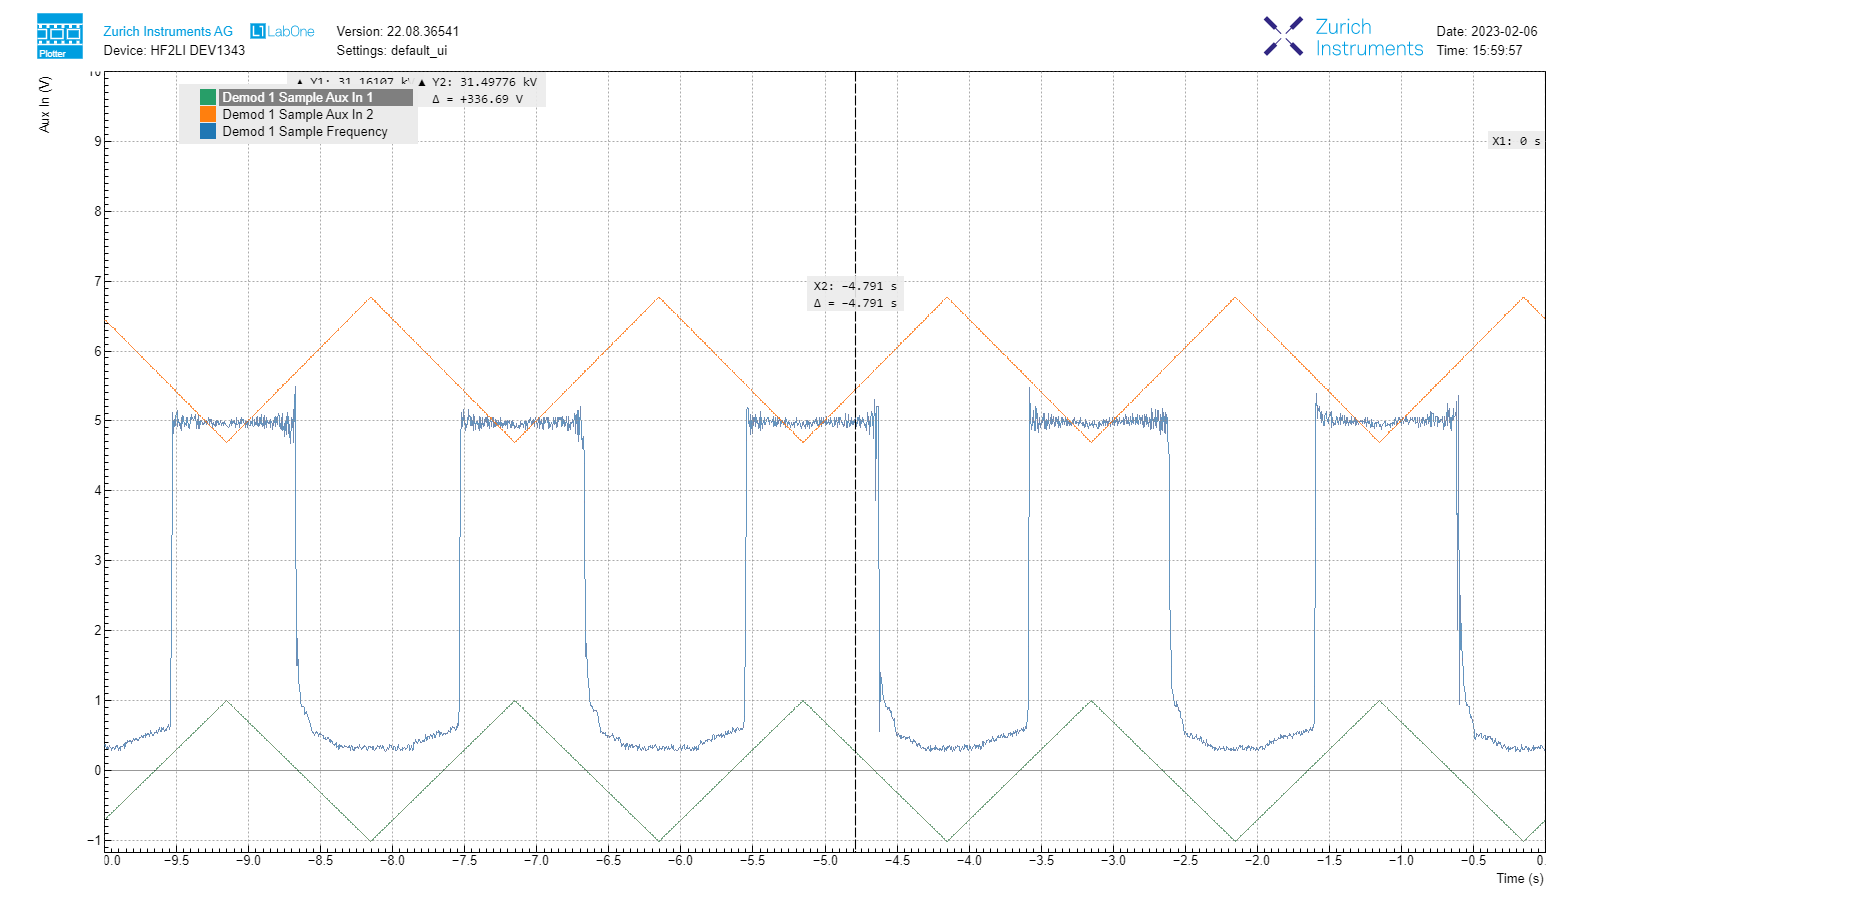
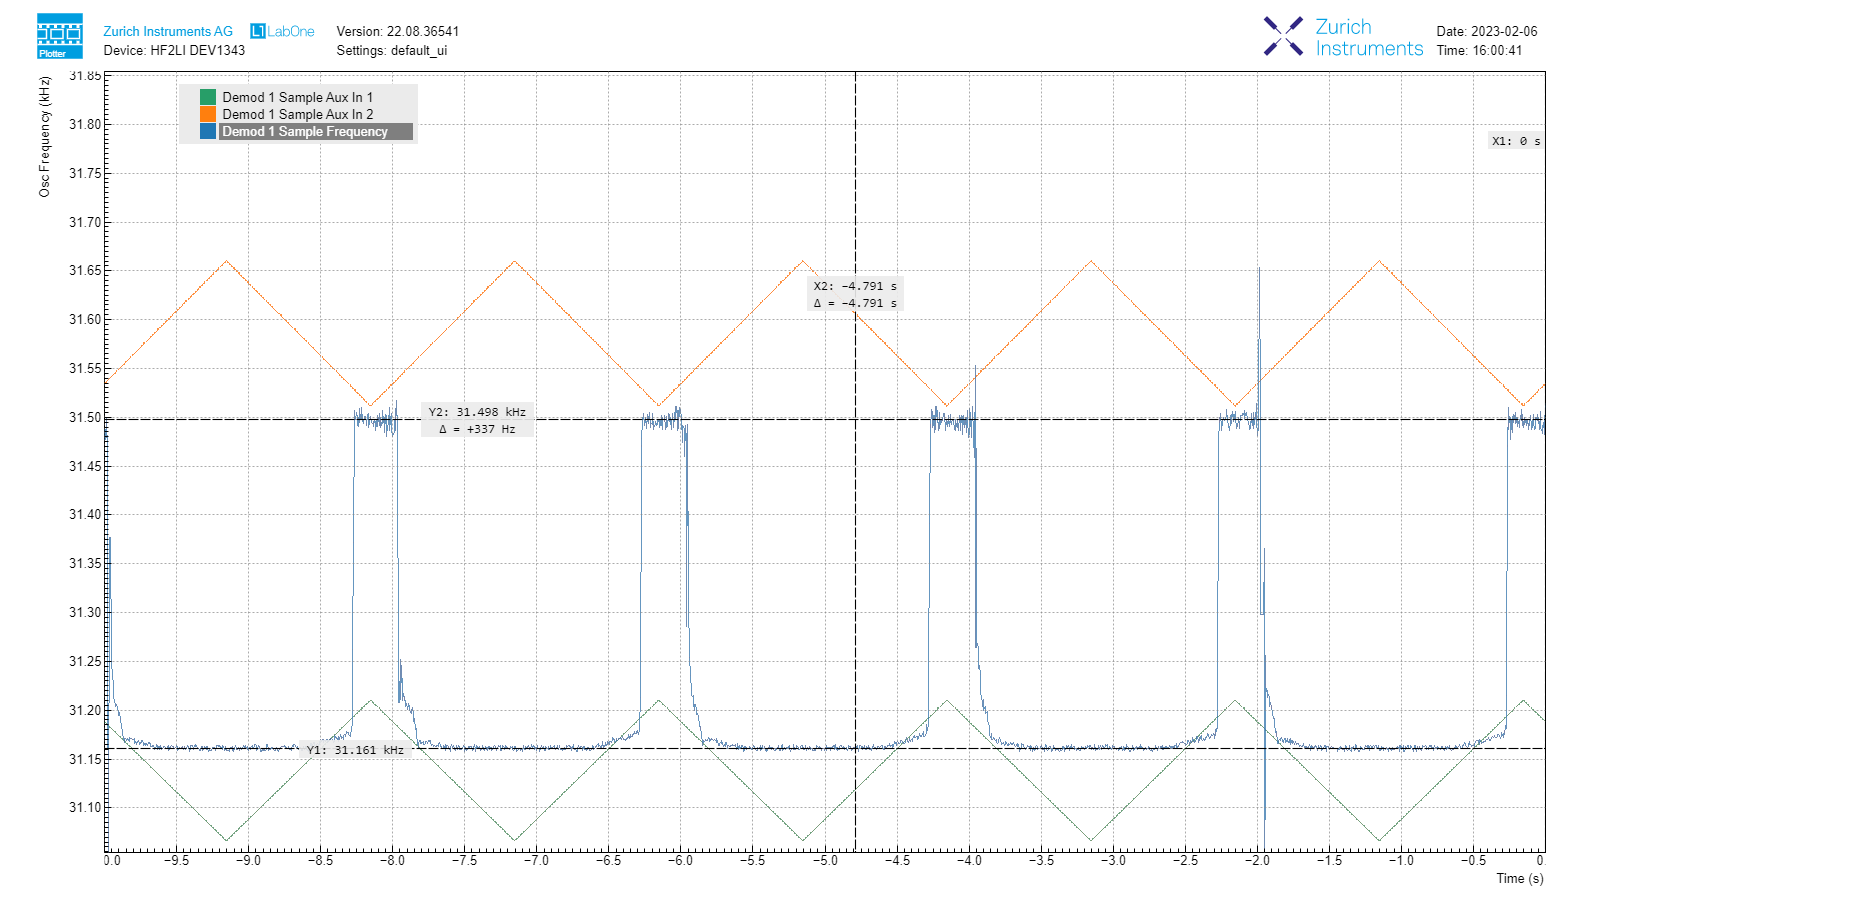

In [1]:
#%matplotlib.widget
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = r'C:\Users\Characterization\B26_scanning_probe\data\230206-15_00_00_AFM_approach_curve' 
os.listdir(data_dir)

['meas_plotter_20230206_155951.txt',
 'meas_plotter_20230206_155957.png',
 'meas_plotter_20230206_160041.png',
 'meas_plotter_20230206_160042.txt']

In [3]:
d = np.loadtxt(
    r'C:\Users\Characterization\B26_scanning_probe\data\230206-15_00_00_AFM_approach_curve\meas_plotter_20230206_155951.txt',
    skiprows=9,
    delimiter=";")

In [4]:
np.shape(d)

(6747, 2)

In [5]:
6747/3

2249.0

In [6]:
# seperate out the 
_i = np.where(d[:,0]==0)[0]
print(_i)
aux1 = np.asarray(d[:_i[0],:]).T
aux2 = np.asarray(d[_i[0]+1:_i[1],:]).T
f = np.asarray(d[_i[1]+1:-1,:]).T

[2248 4497 6746]


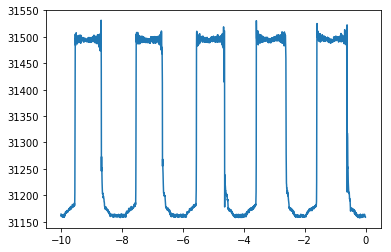

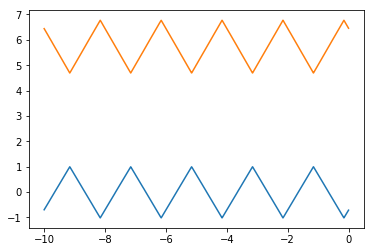

In [7]:
plt.plot(*f)
plt.show()
plt.plot(*aux1)
plt.plot(*aux2)

### calculating df

## chop up sine into single ramps
- fit sine wave
- looking at maxima and minima

In [8]:
assert f.shape == aux1.shape == aux2.shape

In [9]:
df = f[1,:]-np.min(f[1,:])
t = f[0,:]

(-8.4, -6)

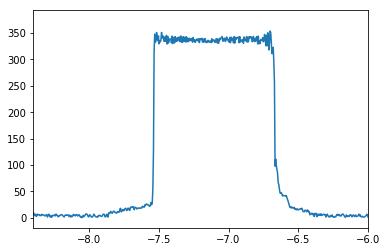

In [10]:
plt.plot(t,df)
plt.xlim((-8.4,-6,))

### crop out a single approach

In [11]:
t_range = (-8.1,-6.2)
cp_mask = (t>t_range[0]) & (t<t_range[1])
t_cp = t[cp_mask]
df_cp = df[cp_mask]
aux2_cp = aux2[1,:][cp_mask]

# make time start from 0s
t_cp = t_cp - t_cp.min()

# convert voltage to displacement
aux2_cp_norm = aux2_cp - aux2_cp.min()
z_cp = aux2_cp_norm *15*6.1/150 # in um

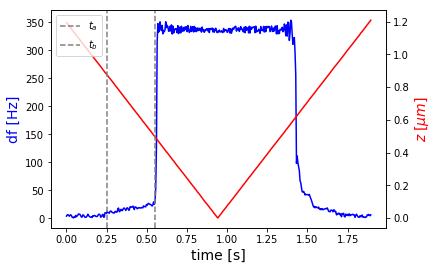

In [12]:
ta = 0.25
tb = 0.55


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(t_cp,df_cp,color="b")
# set x-axis label
ax.set_xlabel("time [s]", fontsize = 14)
# set y-axis label
ax.set_ylabel("df [Hz]",color="b",fontsize=14)
ax.set_yscale("linear")
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
# make a plot with different y-axis using second axis object
ax2.plot(t_cp,z_cp,color="r")
ax2.set_ylabel(r"$z\;[\mu m]$",color="r",fontsize=14)

# plot vertical lines
plt.axvline(x = ta, color = 'grey',ls = "dashed", label = r'$t_a$')
plt.axvline(x = tb, color = 'grey',ls = "dashed", label = r'$t_b$')


# focus on vertical line
t_foc = tb
delta = 0.1
#plt.xlim((t_foc-delta,t_foc+delta))

plt.legend(loc="upper left")

# save the plot as a file
fig.savefig("plots/20230206_qnami_approach",
            format='png',
            dpi=300,
            bbox_inches='tight')

### calculte tip amplitude
- setting on controller:
    - phase: 5
    - gain: 2
    - amp: 5
    - loc. osc.: 5.45

In [13]:
# split approach and retract paths
i_min = np.argmin(aux2_cp)
print(i_min)

df_approach = df_cp[:i_min]
df_retract = df_cp[i_min:]
z_approch = z_cp[:i_min]
z_retract = z_cp[i_min:]

212


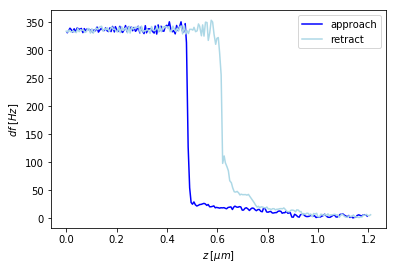

In [14]:
plt.plot(z_approch,df_approach,color="blue",label="approach")
plt.plot(z_retract,df_retract,color="lightblue",label="retract")
plt.xlabel(r"$z\;[\mu m]$")
plt.ylabel(r"$df\;[Hz]$")
plt.yscale("linear")
plt.legend()

### combine both figures

In [20]:
ta = 0.25
tb = 0.55

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# create figure and axis objects with subplots()
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True)
# make a plot
ax1.plot(t_cp,df_cp,color="b")
# set x-axis label
ax1.set_xlabel("$t\;[s]$", fontsize = 14)
# set y-axis label
ax1.set_ylabel("df [Hz]",color="b",fontsize=14)
ax1.set_yscale("linear")
# twin object for two different y-axis on the sample plot
ax12=ax1.twinx()
# make a plot with different y-axis using second axis object
# make a plot with different y-axis using second axis object
ax12.plot(t_cp,z_cp,color="r")
ax12.set_ylabel(r"$z\;[\mu m]$",color="r",fontsize=14)

# plot vertical lines
ax1.axvline(x = ta, color = 'grey',ls = "dashed", label = r'$t_a$')
ax1.axvline(x = tb, color = 'grey',ls = "dashed", label = r'$t_b$')


# focus on vertical line
t_foc = tb
delta = 0.1
#plt.xlim((t_foc-delta,t_foc+delta))

ax1.legend(loc="upper left")


ax2.plot(z_approch,df_approach,color="blue",label="approach")
ax2.plot(z_retract,df_retract,color="lightblue",label="retract")
ax2.set_xlabel(r"$z\;[\mu m]$")

ax2.legend()


#fig.subplots_adjust(wspace=0.6)


# save the plot as a file
plt.savefig("20230206_qnami_approach_combined.pgf")

C:\Users\Characterization\B26_scanning_probe\venv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Characterization\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Characterization\AppData\Local\Programs\Python\Python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Characterization\B26_scanning_probe\venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Characterization\B26_scanning_probe\venv\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    a

RuntimeError: Latex command not found. Install 'pdflatex' or change pgf.texsystem to the desired command.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002097AD6C0D0> (for post_execute):


FileNotFoundError: [WinError 2] The system cannot find the file specified

FileNotFoundError: [WinError 2] The system cannot find the file specified

<Figure size 432x288 with 3 Axes>